# **Time Series Forecasting for NEWS Channel using MA, EMA and ARIMA**

In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import seaborn as sns
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import acf, pacf
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
url_quarter_demand = "https://raw.githubusercontent.com/subhashdixit/Data_Science_Materials_Topicwise/main/Machine_Learning/Time_Series_Forecasting/News_Dataset/NEWS_Dataset_Quarterly%20Demand.csv"
data = pd.read_csv(url_quarter_demand)
data['year_quarter'] = data['year'].astype(str) + "_" + data['quarter'].apply( lambda x: x[-1])

In [3]:
data_year_demand = data[['year', 'demand']]
data_quarter_demand = data[['year_quarter', 'demand']]

data_year_demand = data_year_demand.set_index(['year'])
data_quarter_demand = data_quarter_demand.set_index(['year_quarter'])

In [4]:
train_data_year_demand = data_year_demand.iloc[:12]
test_data_year_demand = data_year_demand.iloc[12:]

train_data_quarter_demand  = data_quarter_demand.iloc[:12]
test_data_quarter_demand  = data_quarter_demand.iloc[12:]

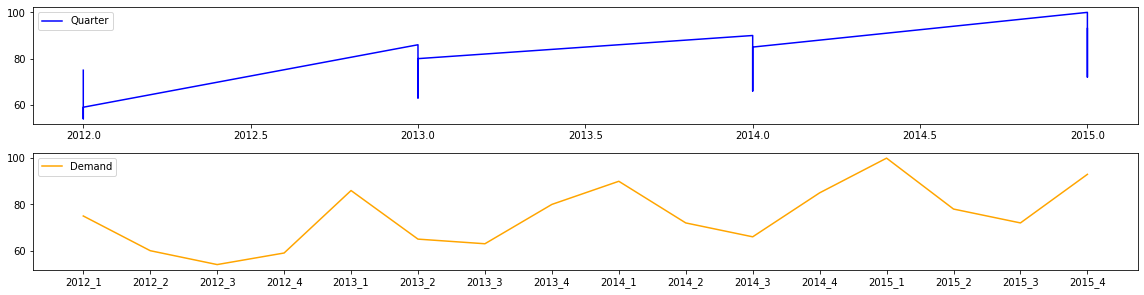

In [5]:
plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(data_year_demand['demand'], color='blue', label='Quarter')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(data_quarter_demand['demand'], color='orange', label='Demand')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# **Moving Average Model**

In [6]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_quarter_demand, order=(0,0,2) )# use the optimized values i.e conclusion drawn from acf and pacf plot
results_MA = model.fit(disp=-1)  

In [7]:
Predicted_Demand = pd,Series(results_MA.predict(start=0, end=15), copy = True)

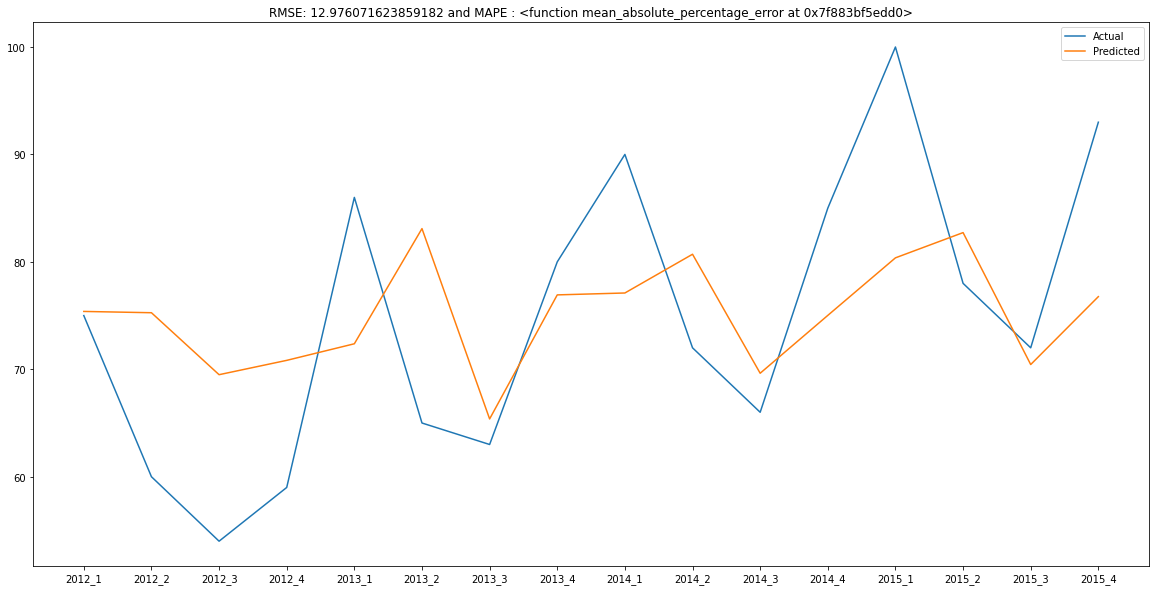

In [8]:
plt.figure(figsize=(20,10))
plt.plot(data_quarter_demand)
plt.plot(Predicted_Demand[1])
plt.title(f"RMSE: {np.sqrt(mean_squared_error(test_data_quarter_demand ,Predicted_Demand[1].iloc[12:]))} and MAPE : {mean_absolute_percentage_error}")
plt.legend(['Actual', 'Predicted'])

# **Exponential Moving Average**

In [9]:
model_EMA = ExponentialSmoothing(data_quarter_demand, seasonal_periods=4, trend="add", seasonal="mul")
results_EMA = model_EMA.fit()

In [10]:
Predicted_Demand_EMA = pd,Series(results_EMA.predict(start=0, end=15), copy = True)

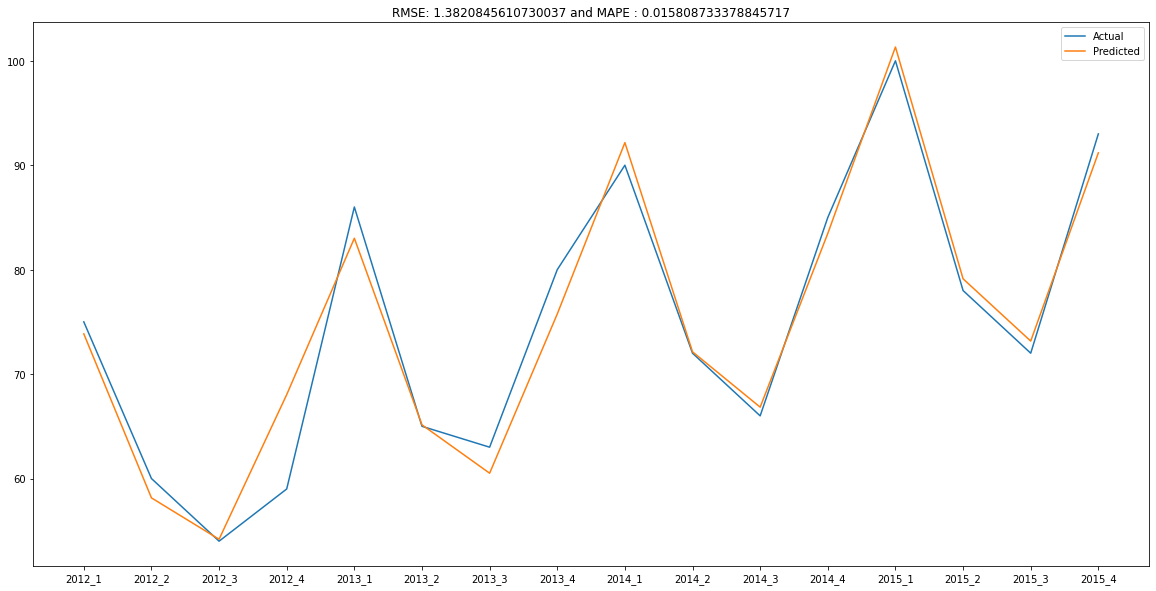

In [11]:
plt.figure(figsize=(20,10))
plt.plot(data_quarter_demand)
plt.plot(Predicted_Demand_EMA[1])
plt.title(f"RMSE: {np.sqrt(mean_squared_error(test_data_quarter_demand ,Predicted_Demand_EMA[1].iloc[12:]))} and MAPE : {mean_absolute_percentage_error(test_data_quarter_demand ,Predicted_Demand_EMA[1].iloc[12:])}")
plt.legend(['Actual', 'Predicted'])

# **ARIMA**

In [12]:
lag_acf = acf(data_quarter_demand, nlags=5)
lag_pacf = pacf(data_quarter_demand, nlags=5, method='ols')

**ACF Plot**

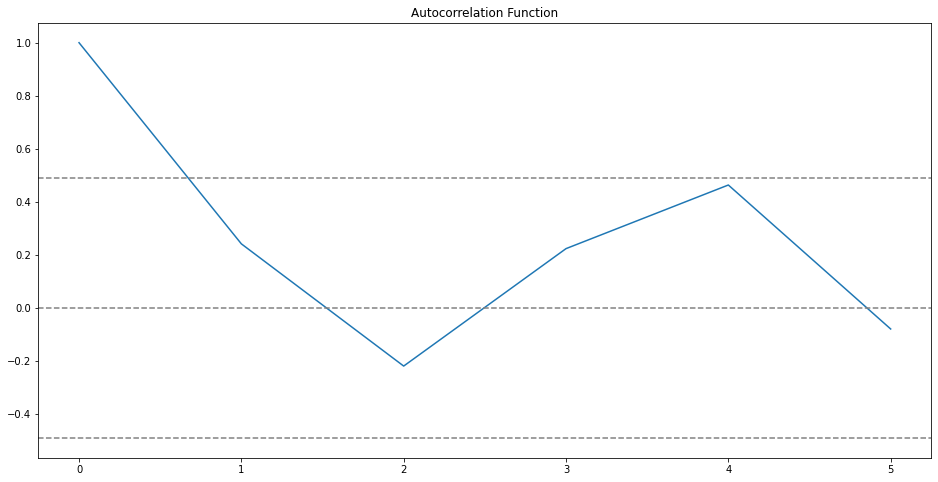

In [13]:
plt.figure(figsize=(16,8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_quarter_demand.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_quarter_demand.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

**PACF Plot**

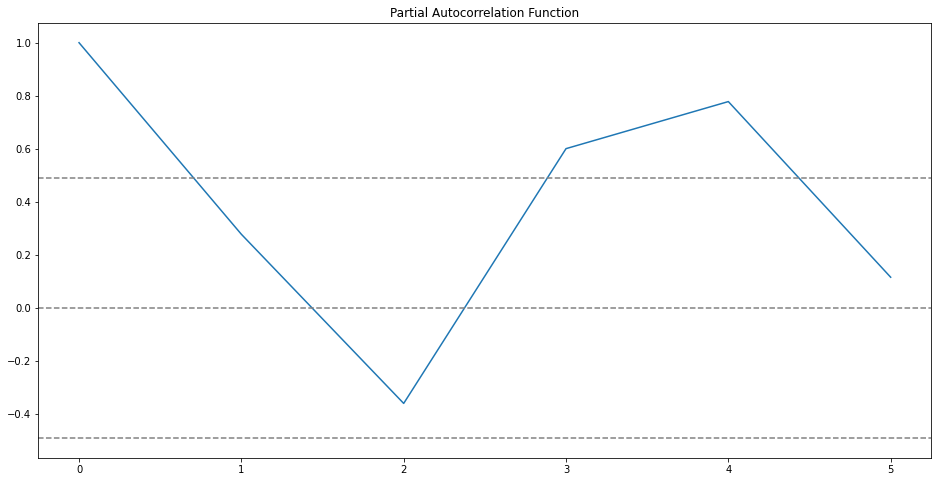

In [14]:
plt.figure(figsize=(16,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_quarter_demand.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_quarter_demand.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [15]:
model_ARIMA = ARIMA(data_quarter_demand, order=(1,1,1) )
results_ARIMA = model_ARIMA.fit(disp=-1)

In [16]:
Predicted_Demand_ARIMA = pd,Series(results_ARIMA.predict(start=1, end=15), copy = True)

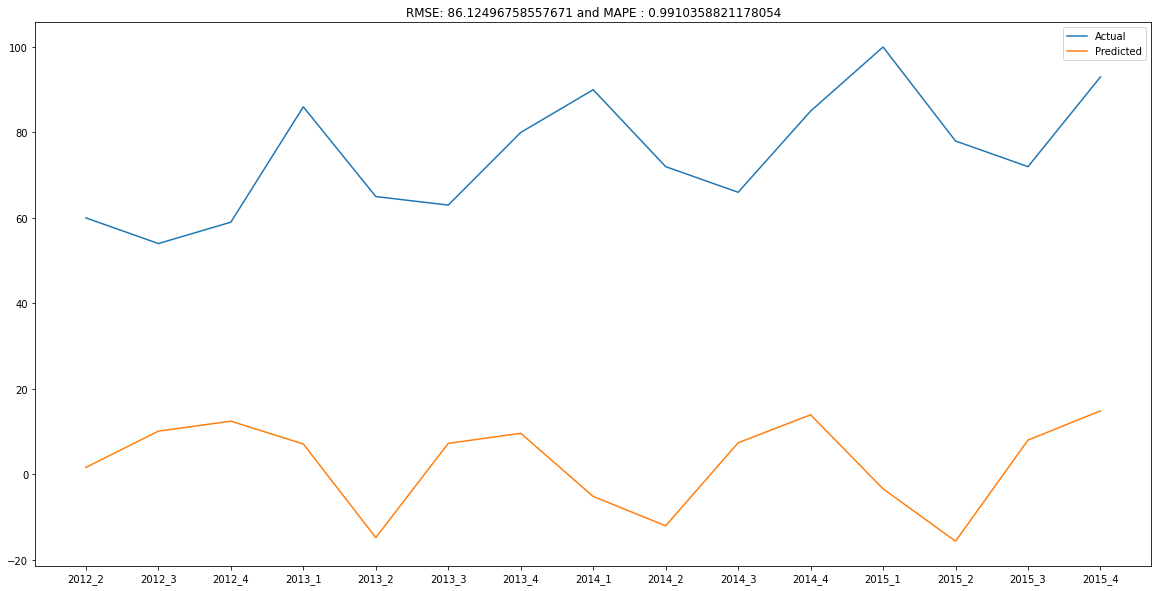

In [17]:
plt.figure(figsize=(20,10))
plt.plot(data_quarter_demand.iloc[1:])
plt.plot(Predicted_Demand_ARIMA[1])
plt.title(f"RMSE: {np.sqrt(mean_squared_error(test_data_quarter_demand ,Predicted_Demand_ARIMA[1].iloc[11:]))} and MAPE : {mean_absolute_percentage_error(test_data_quarter_demand ,Predicted_Demand_ARIMA[1].iloc[11:])}")
plt.legend(['Actual', 'Predicted'])